I regularly use a fitness app called Strava to track my runs and bike rides. A friend of mine told me recently that Strava has an API that allows users to access their raw data. I looked up an article on how to access it and followed the instructions (article: https://medium.com/swlh/using-python-to-connect-to-stravas-api-and-analyse-your-activities-dummies-guide-5f49727aac86). The Strava API requires authentication and uses a token system that was surprisingly complicated. Much of the code below was copied from the article. Once I was able to get the data from my most recent 200 activies into a CSV, I did a few quick data visualizations. I'm thinking that I want to use this API/data for my final project. My initial idea is to create a training log to track my weekly runs and analyze changes in fitness over time. 

In [ ]:
Establishing connection to Strava API

In [10]:
import requests
import json
# Make Strava auth API call with your 
# client_code, client_secret and code
response = requests.post(
                    url = 'https://www.strava.com/oauth/token',
                    data = {
                            'client_id': 72140,
                            'client_secret': '4e8f3558fa19f81cf9b0886f842037a36c1510b4',
                            'code': '0b821cc1e3306e90b2a393db172aba1bc438c598',
                            'grant_type': 'authorization_code'
                            }
                )
#Save json response as a variable
strava_tokens = response.json()
# Save tokens to file
with open('strava_tokens.json', 'w') as outfile:
    json.dump(strava_tokens, outfile)
# Open JSON file and print the file contents 
# to check it's worked properly
with open('strava_tokens.json') as check:
  data = json.load(check)
print(data)

{'token_type': 'Bearer', 'expires_at': 1633584174, 'expires_in': 20384, 'refresh_token': '737b8909d96548abddd3aabbee2e610b7f478402', 'access_token': '627edd1b99118289e53b952369c7e24853b88528', 'athlete': {'id': 3171594, 'username': None, 'resource_state': 2, 'firstname': 'Nick', 'lastname': 'Scott', 'bio': None, 'city': 'Brooklyn', 'state': 'New York', 'country': 'United States', 'sex': 'M', 'premium': False, 'summit': False, 'created_at': '2013-10-09T01:11:42Z', 'updated_at': '2021-09-05T15:12:29Z', 'badge_type_id': 0, 'weight': 72.5748, 'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/3171594/3765688/3/medium.jpg', 'profile': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/3171594/3765688/3/large.jpg', 'friend': None, 'follower': None}}


Getting first 30 activities to inspect data

In [12]:
import requests
from pandas.io.json import json_normalize
import json
import csv
# Get the tokens from file to connect to Strava
with open('strava_tokens.json') as json_file:
    strava_tokens = json.load(json_file)
# Loop through all activities
url = "https://www.strava.com/api/v3/activities"
access_token = strava_tokens['access_token']
# Get first page of activities from Strava with all fields
r = requests.get(url + '?access_token=' + access_token)
r = r.json()
    
df = json_normalize(r)
df.to_csv('strava_activities_all_fields.csv')

C:\Users\nickx\AppData\Local\Temp/ipykernel_16040/860653310.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(r)


Automate retrieval of new tokens when old ones expire

In [13]:
import requests
import json
import time
# Get the tokens from file to connect to Strava
with open('strava_tokens.json') as json_file:
    strava_tokens = json.load(json_file)
# If access_token has expired then 
# use the refresh_token to get the new access_token
if strava_tokens['expires_at'] < time.time():
# Make Strava auth API call with current refresh token
    response = requests.post(
                        url = 'https://www.strava.com/oauth/token',
                        data = {
                                'client_id': [INSERT_CLIENT_ID_HERE],
                                'client_secret': '[INSERT_CLIENT_SECRET_KEY]',
                                'grant_type': 'refresh_token',
                                'refresh_token': strava_tokens['refresh_token']
                                }
                    )
# Save response as json in new variable
    new_strava_tokens = response.json()
# Save new tokens to file
    with open('strava_tokens.json', 'w') as outfile:
        json.dump(new_strava_tokens, outfile)
# Use new Strava tokens from now
    strava_tokens = new_strava_tokens
# Open the new JSON file and print the file contents 
# to check it's worked properly
with open('strava_tokens.json') as check:
  data = json.load(check)
print(data)

{'token_type': 'Bearer', 'expires_at': 1633584174, 'expires_in': 20384, 'refresh_token': '737b8909d96548abddd3aabbee2e610b7f478402', 'access_token': '627edd1b99118289e53b952369c7e24853b88528', 'athlete': {'id': 3171594, 'username': None, 'resource_state': 2, 'firstname': 'Nick', 'lastname': 'Scott', 'bio': None, 'city': 'Brooklyn', 'state': 'New York', 'country': 'United States', 'sex': 'M', 'premium': False, 'summit': False, 'created_at': '2013-10-09T01:11:42Z', 'updated_at': '2021-09-05T15:12:29Z', 'badge_type_id': 0, 'weight': 72.5748, 'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/3171594/3765688/3/medium.jpg', 'profile': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/3171594/3765688/3/large.jpg', 'friend': None, 'follower': None}}


Getting 200 activities from Strava. Ready to start playing with the data!

In [17]:
import pandas as pd
import requests
import json
import time
## Get the tokens from file to connect to Strava
with open('strava_tokens.json') as json_file:
    strava_tokens = json.load(json_file)
## If access_token has expired then use the refresh_token to get the new access_token
if strava_tokens['expires_at'] < time.time():
#Make Strava auth API call with current refresh token
    response = requests.post(
                        url = 'https://www.strava.com/oauth/token',
                        data = {
                                'client_id': [INSERT_CLIENT_ID_HERE],
                                'client_secret': '[INSERT_CLIENT_SECRET_KEY]',
                                'grant_type': 'refresh_token',
                                'refresh_token': strava_tokens['refresh_token']
                                }
                    )
#Save response as json in new variable
    new_strava_tokens = response.json()
# Save new tokens to file
    with open('strava_tokens.json', 'w') as outfile:
        json.dump(new_strava_tokens, outfile)
#Use new Strava tokens from now
    strava_tokens = new_strava_tokens
r = requests.get(url + '?access_token=' + access_token + '&per_page=200')
r = r.json()
    
df = json_normalize(r)
df.to_csv('strava_activities_all_fields.csv')

C:\Users\nickx\AppData\Local\Temp/ipykernel_16040/3002981862.py:30: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(r)


importing activities csv and limiting them to runs only (removing bike rides, hikes, etc.)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_activities = pd.read_csv('/Users/nickx/Documents/school_work/21FA/info_664_pfch/strava_activities_all_fields.csv')

df_runs = df_activities[df_activities['type'] == 'Run']
df_runs.head(10)

,Unnamed: 0,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts,average_temp,weighted_average_watts,max_watts
0,0,2,Hill sprints,9851.7,3621,3869,173.7,Run,0.0,6071933424,...,1,a6071933424,y}iwF~lnbMLTwATcBLOLMhBCpCQnAYn@At@Bb@KnEQ`M@b...,2,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Morning Run,9726.4,3368,3447,70.7,Run,NaN,6066894826,...,1,a6066894826,}}iwFdnnbMDINMZC^Bh@QDKHaACQ?q@Ba@?q@Cm@CMAQG[...,2,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Finishing off the week,6396.7,1998,2119,40.9,Run,0.0,6059611251,...,1,a6059611251,}ziwFbqnbMNWFH@V?O{@GM@]DKPOFq@HWJILC`@?xAAJGF...,2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,Long one for the week,13101.6,4398,4451,117.2,Run,0.0,6052589433,...,1,a6052589433,a~iwF~lnbM_Ab@eAR}BR[M{Fh@UDKL_Ex@kABu@LWPWIy@...,2,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,Weeknight LES check-in,10183.4,3455,3609,101.7,Run,0.0,6044978615,...,1,a6044978615,w}iwFxknbMAEC?@A@RGRGLk@TmBNKFEN@b@G^CvBETMNFn...,2,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2,Morning Run,8961.5,2728,2770,0.0,Run,0.0,6037723576,...,1,a6037723576,yfpwFtujbMHAJDJCFDDGX?HCB@@EF@d@KrAKPMR[Hc@@YQ...,2,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2,Recovery pace,9794.6,3578,3761,73.3,Run,0.0,6027311350,...,1,a6027311350,u~iwFpnnbMJ@?HRUJNHCTS\QTQ^KPWDS@SGs@?g@CKA]?]...,2,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2,Long run,15196.1,5251,5518,100.2,Run,0.0,6022920225,...,1,a6022920225,a~iwF`mnbMCNcFbAiJ~@eEt@gBH_AX}C`@wC?kDj@MJ}Ex...,2,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2,Afternoon Run,10336.1,3410,3567,104.0,Run,NaN,6013257677,...,1,a6013257677,q}iwFrmnbMm@]HLcBFy@XEj@@tA?p@E\@XA`AIT@r@GXE~...,2,NaN,NaN,NaN,NaN,NaN,NaN
11,11,2,Morning track sesh,8220.6,2555,2564,0.0,Run,0.0,6001340003,...,1,a6001340003,m_pwFjjjbM@LMH?JEJAJDFEJ?t@EJUH[HeBNa@@IBSLMRG...,2,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
A quick bar plot of my last several runs by distance

Text(0, 0.5, 'Distance (meters)')

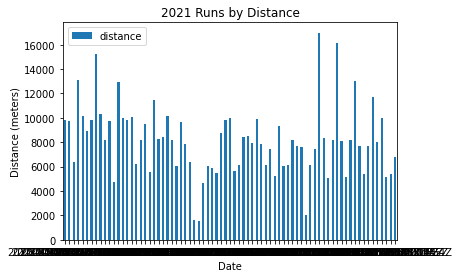

In [32]:
df_runs.plot.bar(x='start_date_local', y= 'distance', rot=0)

plt.title("2021 Runs by Distance")
plt.xlabel("Date")
plt.ylabel("Distance (meters)")

Another quick bar plot of the same runs as above, but displaying average heart rate (a decent approximation of effort). Starting to get some good ideas for a final project!

Text(0, 0.5, 'Avg HR (bpm)')

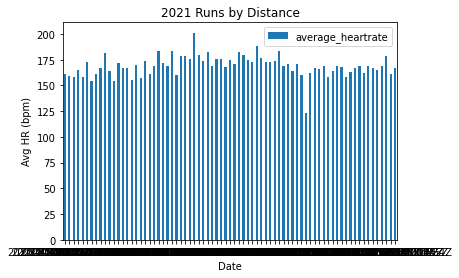

In [33]:
df_runs.plot.bar(x='start_date_local', y= 'average_heartrate', rot=0)

plt.title("2021 Runs by Distance")
plt.xlabel("Date")
plt.ylabel("Avg HR (bpm)")